K值的选择反映了对近似误差与估计误差之间的权衡，通常由交叉验证选择最优的K

In [1]:
import math
from itertools import combinations

In [2]:
def L(x, y, p=2):
    #x1=[1,1], x2=[5,1]
    if len(x) == len(y) and len(x) > 1:
        sum = 0
        for i in range(len(x)):
            sum += math.pow(abs(x[i] - y[i]), p)
        return math.pow(sum, 1/p)
    else:
        return 0

In [3]:
x1 = [1, 1]
x2 = [5, 1]
x3 = [4, 4]

In [4]:
for i in range(1, 5):
    r = {'1-{}'.format(c):L(x1, c, p = i) for c in [x2, x3]}
    print(min(zip(r.values(), r.keys())))

(4.0, '1-[5, 1]')
(4.0, '1-[5, 1]')
(3.7797631496846193, '1-[4, 4]')
(3.5676213450081633, '1-[4, 4]')


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from collections import Counter

In [6]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['label'] = iris.target
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']

In [7]:
df

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


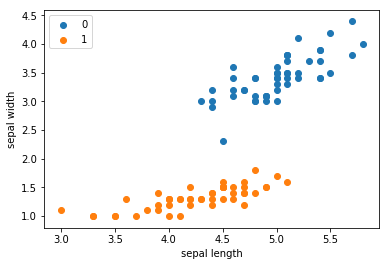

In [8]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['petal length'],df[50:100]['petal width'], label = '1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [14]:
data = np.array(df.iloc[:100,[0,1,-1]])
X,y = data[:,:-1],data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
class KNN:
    def __init__(self, X_train, y_train, n_neighbors=3, p=2):
        """
        parameter: n_neighbors 临近点个数
        parameter: p 距离度量
        """
        self.n = n_neighbors
        self.p = p
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X):
        # 取出n个点
        knn_list = []
        for i in range(self.n):
            dist = np.linalg.norm(X - self.X_train[i], ord=self.p)
            knn_list.append((dist, self.y_train[i]))

        for i in range(self.n, len(self.X_train)):
            max_index = knn_list.index(max(knn_list, key=lambda x: x[0]))
            dist = np.linalg.norm(X - self.X_train[i], ord=self.p)
            if knn_list[max_index][0] > dist:
                knn_list[max_index] = (dist, self.y_train[i])

        # 统计
        knn = [k[-1] for k in knn_list]
        count_pairs = Counter(knn)
#         max_count = sorted(count_pairs, key=lambda x: x)[-1]
        max_count = sorted(count_pairs.items(), key=lambda x: x[1])[-1][0]
        return max_count

    def score(self, X_test, y_test):
        right_count = 0
        n = 10
        for X, y in zip(X_test, y_test):
            label = self.predict(X)
            if label == y:
                right_count += 1
        return right_count / len(X_test)

In [16]:
clf = KNN(X_train, y_train)

In [17]:
clf.score(X_test, y_test)

1.0

In [18]:
test_point = [6.0, 3.0]
print('Test Point：{}'.format(clf.predict(test_point)))

Test Point：1.0


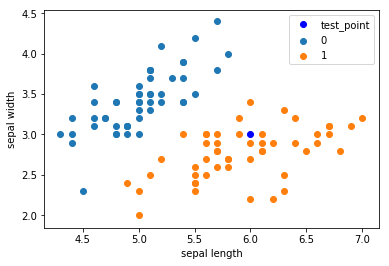

In [19]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.plot(test_point[0], test_point[1], 'bo', label='test_point')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

## scikit-learn实例 ##

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
clf_sk = KNeighborsClassifier()
clf_sk.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [26]:
clf_sk.score(X_test, y_test)

1.0

## sklearn.neighbors.KNeighborsClassifier ##

## 构造平衡kd树算法##

In [27]:
#kd-tree每个结点中主要包含的数据结构如下：
class KdNode(object):
    def __init__(self, dom_elt, split, left, right):
        self.dom_elt = dom_elt   #k维向量节点(k维空间中的一个样本点)
        self.split = split       #整数(进行分割维度的序号)
        self.left = left         #该结点分割超平面左子空间构成的kd-tree
        self.right = right       #该结点分割超平面右子空间构成的kd-tree
        
class KdTree(object):
    def __init__(self, data):
        k = len(data[0])     #数据维度
        
        def CreateNode(split, data_set):   #按第split维划分数据集exset创建KdNode
            if not data_set:
                return None
            #key参数的值为一个函数，此函数只有一个参数且返回一个值用来进行比较
            #operator模块提供的itemgetter函数用于获取对象的哪些维的数据,参数为需要获取的数据在对象中的序号
            #data_set.sort(key=itemgetter(split))  #按key进行分割的那一维数据排序
            data_set.sort(key=lambda x: x[split])
            split_pos = len(data_set) // 2
            median = data_set[split_pos]
            split_next = (split + 1) % k
            
            #递归的创建kd树
            return KdNode(median, split, CreateNode(split_next, data_set[:split_pos]), CreateNode(split_next, data_set[split_pos + 1:]))
        
        self.root = CreateNode(0, data)   #从第0维分量开始创建kd树,返回根节点
        
#KDTree的前序遍历
def preorder(root):
    print(root.dom_elt)
    if root.left:    #节点不为空
        preorder(root.left)
    if root.right:
        preorder(root.right)

In [29]:
#对构建好的kd树进行搜索,寻找与目标点最近的样本点
from math import sqrt
from collections import namedtuple

#定义一个namedtuple，分别存放最近坐标点、最近距离和访问过的节点数
result = namedtuple("Result_tuple","nearest_point nearest_dist nodes_visited")

def find_nearest(tree, point):
    k = len(point)   #数据维度
    def travel(kd_node, target, max_dist):
        if kd_node is None:
            return result([0] * k ,float("inf"), 0)   #python中用float("inf")和float("-inf")表示正负无穷
        
        nodes_visited = 1
        
        s = kd_node.split   #进行分割的维度
        pivot = kd_node.dom_elt    #进行分割的"轴"
        
        if target[s] <= pivot[s]:    #如果目标点第s维小于分割轴的对应值(目标离左子树更近)
            nearer_node = kd_node.left   #下一个访问节点为左子树根节点
            further_node = kd_node.right #同时记录下右子树
        else:  #目标离右子树更近
            nearer_node = kd_node.right   #下一个访问节点为右子树根节点
            further_node = kd_node.left
            
        temp1 = travel(nearer_node, target, max_dist)  #进行遍历找到包含目标点的区域
        
        nearest = temp1.nearest_point   #以此叶结点作为"当前最近点"
        dist = temp1.nearest_dist       #更新最近距离
        
        nodes_visited += temp1.nodes_visited
        
        if dist < max_dist:
            max_dist = dist    #最近点将在以目标点为球心，max_dist为半径的超球体内
            
        temp_dist = abs(pivot[s] - target[s])  #第s维上目标点与分割超平面的距离
        if max_dist < temp_dist:   #判断超球体是否与超平面相交
            return result(nearest, dist, nodes_visited)   #不相交则可以直接返回,不用继续判断
        
        #计算目标点与分割点的欧式距离
        temp_dist = sqrt(sum((p1 - p2)**2 for p1, p2 in zip(pivot, target)))
        
        if temp_dist < dist:   #如果"更近"
            nearest = pivot    #更新最近点
            dist = temp_dist   #更新最近距离
            max_dist = dist    #更新超球体半径
            
        #检查另一个子结点对应的区域是否有更近的点
        temp2 = travel(further_node, target, max_dist)
        
        nodes_visited += temp2.nodes_visited
        if temp2.nearest_dist < dist:    #如果另一个子结点内存在更近距离
            nearest = temp2.nearest_point    #更新最近点
            dist = temp2.nearest_dist        #更新最近距离
            
        return result(nearest, dist, nodes_visited)
    
    return travel(tree.root, point, float("inf"))   #从根节点开始递归

In [30]:
#例3.2
data = [[2,3],[5,4],[9,6],[4,7],[8,1],[7,2]]
kd = KdTree(data)
preorder(kd.root)

[7, 2]
[5, 4]
[2, 3]
[4, 7]
[9, 6]
[8, 1]


In [31]:
from time import clock
from random import random

#产生n个k维随机向量，每维分量值在0~1之间
def random_point(k):
    return [random() for _ in range(k)]

#产生n个k维随机向量
def random_points(k, n):
    return [random_point(k) for _ in range(n)]

In [32]:
ret = find_nearest(kd, [3,4.5])
print(ret)

Result_tuple(nearest_point=[2, 3], nearest_dist=1.8027756377319946, nodes_visited=4)


In [33]:
N = 400000
t0 = clock()
kd2 = KdTree(random_points(3, N))   # 构建包含四十万个3维空间样本点的kd树
ret2 = find_nearest(kd2, [0.1,0.5,0.8])  # 四十万个样本点中寻找离目标最近的点
t1 = clock()
print("time：",t1-t0, "s")
print(ret2)

time： 5.830085878551211 s
Result_tuple(nearest_point=[0.09489244202754543, 0.4987153229414356, 0.8015897603796919], nearest_dist=0.005501352711072417, nodes_visited=44)
